In [1]:
import pyqtgraph as pqg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%gui qt

In [2]:
from skimage.io import imread
im_fname = '/Users/bennettd/data/movies/20170131_5_1_GFAPRGECO_DBHGC5slow_5dpf_waist_CLPause_0GAIN_GAINMODULATION_20170131_220542.tif'
ep_fname = '/Users/bennettd/data/20170131/20170131_4_1_GFAPRGECO_DBHGC5slow_5dpf_waist_CLPause_0GAIN_GAINMODULATION_20170131_193518/20170131_5_1_GFAPRGECO_DBHGC6slow_5dpf_CLPAUSE_0GAIN_GAINMODULATION.10chFlt'

In [3]:
%%time
data = imread(im_fname)
# remove edge to hide motion correction artifact
data = data[:,:,15:]
ref = data.mean(0)

CPU times: user 7.81 s, sys: 5.48 s, total: 13.3 s
Wall time: 17.4 s


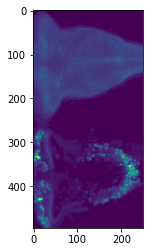

In [23]:
plt.imshow(ref)

In [5]:
data.shape

(8500, 495, 249)

# Estimate timing of waves

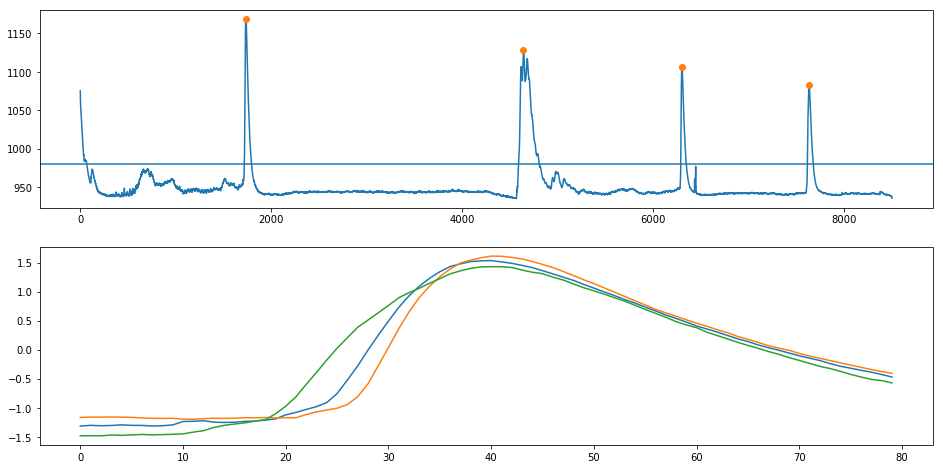

In [48]:
from scipy.signal import argrelmax
from scipy.stats import zscore
ts = data[:,0:200,:].mean((1,2)) 
nr = 2
fig, axs = plt.subplots(nrows=nr, figsize=(16,4 * nr))
axs[0].plot(ts)
thr = 980
axs[0].axhline(thr)
mx = argrelmax(ts * (ts > thr), order=500)[0]
axs[0].plot(mx, ts[mx], 'o')

to_keep = [0,2,3]
mx = mx[to_keep]
window = np.arange(-40,40)
for m in mx:
    axs[1].plot(zscore(ts[m + window]))

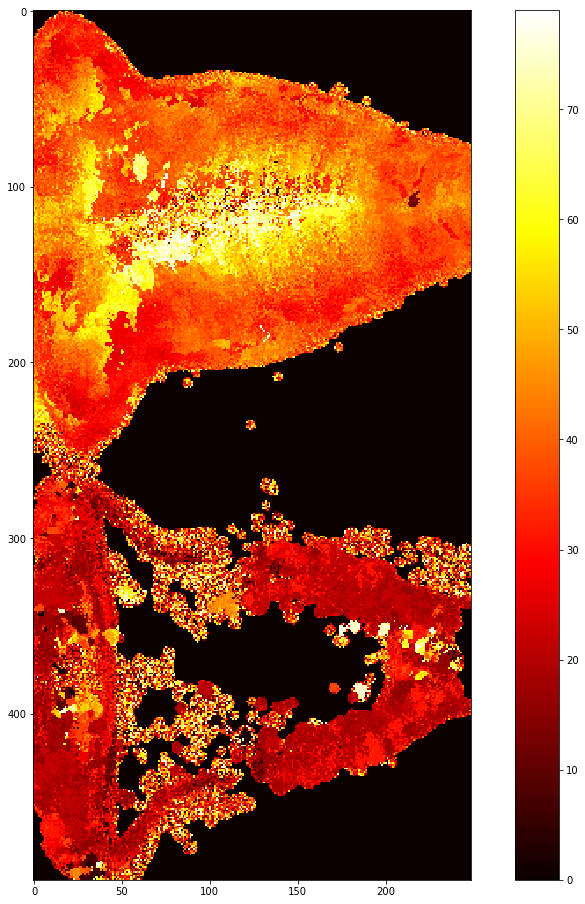

In [51]:
plt.figure(1,(16,16))
plt.imshow(np.argmax(data[mx[2] + window], axis=0), cmap='hot')
plt.colorbar()